In [167]:
df = pd.read_csv(r"C:\Users\grace\Documents\ERP\TextFiles\test\text\app\same_person.csv", encoding="utf-8", on_bad_lines='skip')
df=df.dropna(subset=['pred_person', 'person'])

In [168]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- Load CSV ---
# Replace 'data.csv' with your file name
# Ensure these match your actual column names
true_labels = df["person"]
pred_labels = df["pred_person"]

# --- Check for NaN values ---

# --- Metrics ---
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average="weighted", zero_division=0)
recall = recall_score(true_labels, pred_labels, average="weighted", zero_division=0)
f1 = f1_score(true_labels, pred_labels, average="weighted", zero_division=0)

# --- Print results ---
print(f"{accuracy:.4f}")
print(f"{precision:.4f}")
print(f"{recall:.4f}")
print(f"{f1:.4f}")

fp_mask = (pred_labels != "not_statement") & (true_labels == "not_statement")

false_positives = np.sum(fp_mask)
print(false_positives)
print(len(df))


0.2791
0.2552
0.2791
0.2372
0
172


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- Load CSV ---
# Replace 'data.csv' with your file name
# Ensure these match your actual column names
true_labels = df["true_label"]
pred_labels = df["pred_label"]

# --- Metrics ---
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average="weighted", zero_division=0)
recall = recall_score(true_labels, pred_labels, average="weighted", zero_division=0)
f1 = f1_score(true_labels, pred_labels, average="weighted", zero_division=0)

# --- Print results ---
print(f"{accuracy:.4f}")
print(f"{precision:.4f}")
print(f"{recall:.4f}")
print(f"{f1:.4f}")

fp_mask = (pred_labels != "not_statement") & (true_labels == "not_statement")

false_positives = np.sum(fp_mask)
print(false_positives)
print(len(df))


0.5052
0.6361
0.5052
0.5480
117
483


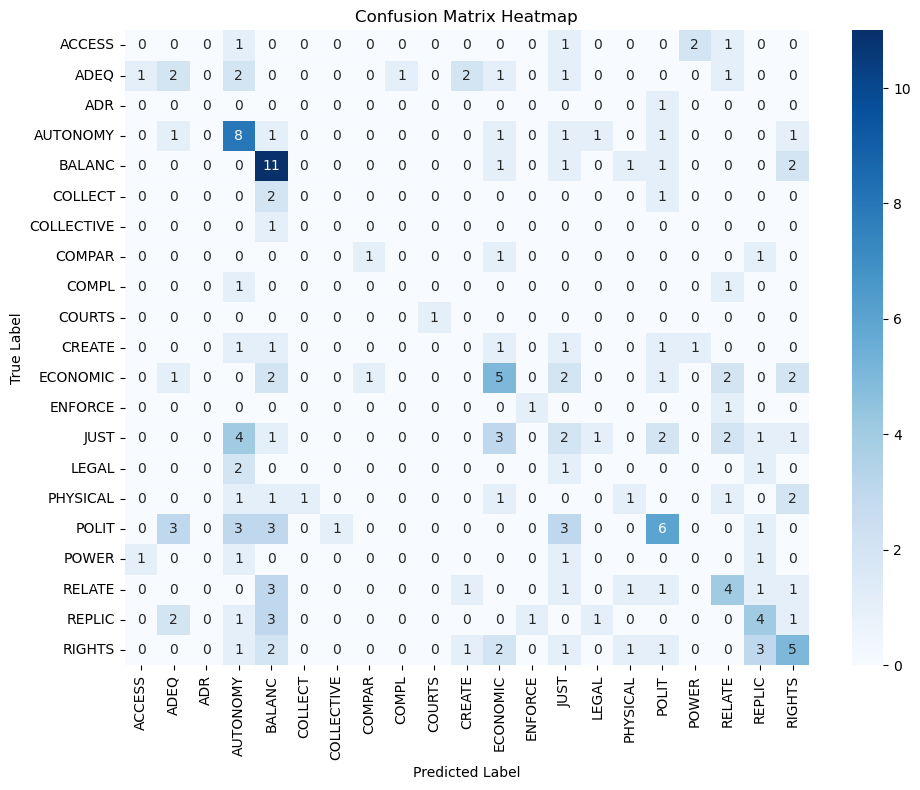

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = sorted(list(set(true_labels) | set(pred_labels)))  # all unique class labels
cm = confusion_matrix(true_labels, pred_labels, labels=labels)

# --- Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,         # show numbers
    fmt="d",            # integer format
    cmap="Blues",       # color scheme
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()